### Phase 1: Data Acquisition & Pre-processing

In this initial phase, we lay the groundwork for our analysis. Raw data is rarely perfect; it often requires "translation" and "structural cleaning" before we can extract meaningful patterns.

##### 📂 Data Source
The dataset used in this study is sourced from the **IDDA Open Data portal**, specifically focusing on the **Freight Transportation Expenses (Nəqliyyat sektorunda yük daşınmasına çəkilmiş xərclər)** from 1995 to 2024.

##### 🛠️ Step-by-Step Preparation:
1. **Loading the Environment:** Importing essential libraries (`Pandas`, `NumPy`, `Matplotlib`) for data manipulation and visualization.
2. **Index Alignment:** We set the `Year` as our index. In time-series analysis, this allows us to treat time as a continuous anchor for all other variables.
3. **Dimensionality Reduction:** Removed redundant or empty columns (e.g., `Unnamed: 1`) that do not contribute to the economic analysis.
4. **Localization & Translation:** Since the original dataset is in Azerbaijani, we translated all headers to English. This ensures the project is accessible to an international audience and follows standard coding conventions.
5. **Unit Normalization:** Identified a critical unit mismatch where `Railway` was labeled in Millions while the `Total` was in Thousands. We corrected this label to ensure all sector costs are measured on the same scale (Thousand Manats).

---
*By the end of this phase, we have transformed a raw spreadsheet into a structured DataFrame ready for statistical auditing.*

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

With the libraries imported, we can now acquire the dataset for our analysis.
Our dataset will focus on the expenses incurred in freight transportation within the transportation sector (Nəqliyyat sektorunda yük daşınmasına çəkilmiş xərclər).

In [27]:
my_dataset = pd.read_csv('my_dataset.csv')
my_dataset.set_index("Year", inplace=True)
my_dataset.head()

,Unnamed: 1,Cəmi (min manat),Dəmir yolu (mln.manat),Dəniz (min manat),Hava (min manat),Boru kəməri (min manat),neft kəməri (min manat),qaz kəməri (min manat),Avtomobil (min manat)
Year,,,,,,,,,
2024,NaN,4021903.0,427422.0,211906.0,2123704.0,901346.0,301801.0,599545.0,357525.0
2023,NaN,3546099.0,326202.0,202304.0,1835553.0,925185.0,256391.0,668794.0,256855.0
2022,NaN,5192048.0,251589.0,217667.0,3323161.0,1158408.0,218571.0,939837.0,241223.0
2021,NaN,4468545.0,247469.0,173744.0,2831815.0,1021213.0,240720.0,780493.0,194304.0
2020,NaN,3382887.0,273927.0,165743.0,2354497.0,411830.0,243661.0,168169.0,176890.0


Since we have an unnecessary column, we will drop it and continue. The column names will also be translated into English.

In [28]:
my_dataset.drop(columns=["Unnamed: 1"], inplace=True)
my_dataset.rename(columns={"Cəmi (min manat)": "Total (thousand manats)",
                            "Dəmir yolu (mln.manat)": "Railway (thousand manats)",
                            "Dəniz (min manat)": "Sea (thousand manats)",
                            "Hava (min manat)": "Air (thousand manats)",
                            "Boru kəməri (min manat)": "Pipeline (thousand manats)",
                            "neft kəməri (min manat)": "oil pipeline (thousand manats)",
                            "qaz kəməri (min manat)": "gas pipeline (thousand manats)",
                            "Avtomobil (min manat)": "Automobile (thousand manats)"}, inplace=True)
my_dataset.head(5)

,Total (thousand manats),Railway (thousand manats),Sea (thousand manats),Air (thousand manats),Pipeline (thousand manats),oil pipeline (thousand manats),gas pipeline (thousand manats),Automobile (thousand manats)
Year,,,,,,,,
2024,4021903.0,427422.0,211906.0,2123704.0,901346.0,301801.0,599545.0,357525.0
2023,3546099.0,326202.0,202304.0,1835553.0,925185.0,256391.0,668794.0,256855.0
2022,5192048.0,251589.0,217667.0,3323161.0,1158408.0,218571.0,939837.0,241223.0
2021,4468545.0,247469.0,173744.0,2831815.0,1021213.0,240720.0,780493.0,194304.0
2020,3382887.0,273927.0,165743.0,2354497.0,411830.0,243661.0,168169.0,176890.0


### Phase 2: Exploratory Data Analysis (EDA) & Visualization

With the data cleaning and integrity audit complete, we now have a "Source of Truth" that we can trust. 

##### 🛠 Summary of Data Preparation:
* **Standardization:** Translated all categories into English and standardized units across sectors.
* **Logic Alignment:** Identified the hierarchical nature of the data (Pipeline = Oil + Gas) to ensure no values are double-counted in our totals.

##### 🎯 Objective of this Phase:
We will now move from "numbers in a table" to **visual storytelling**. Our focus will be on identifying:
1.  The overall **economic trajectory** of the transport sector from 1995 to 2024.
2.  The **structural shift** between different modes of transport.
3.  The **emerging dominance** of specific sectors that signal a change in Azerbaijan's logistics strategy.

First, we want to see if the transport sector is growing or shrinking. We do this by plotting the Total over the years.

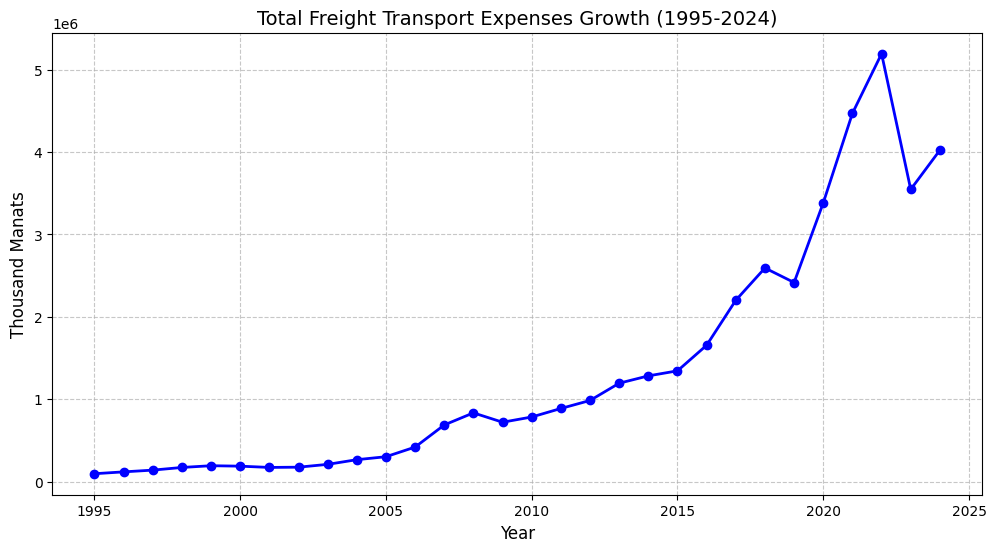

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(my_dataset.index, my_dataset['Total (thousand manats)'], marker='o', color='b', linewidth=2)
plt.title('Total Freight Transport Expenses Growth (1995-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Thousand Manats', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Now that we see the total growth, we need to know who is driving it. This is where we use the main categories we identified earlier (Railway, Sea, Air, Pipeline, Automobile).

A Stacked Area Chart is perfect here because it shows the "Mountain" of growth and how the internal pieces changed.

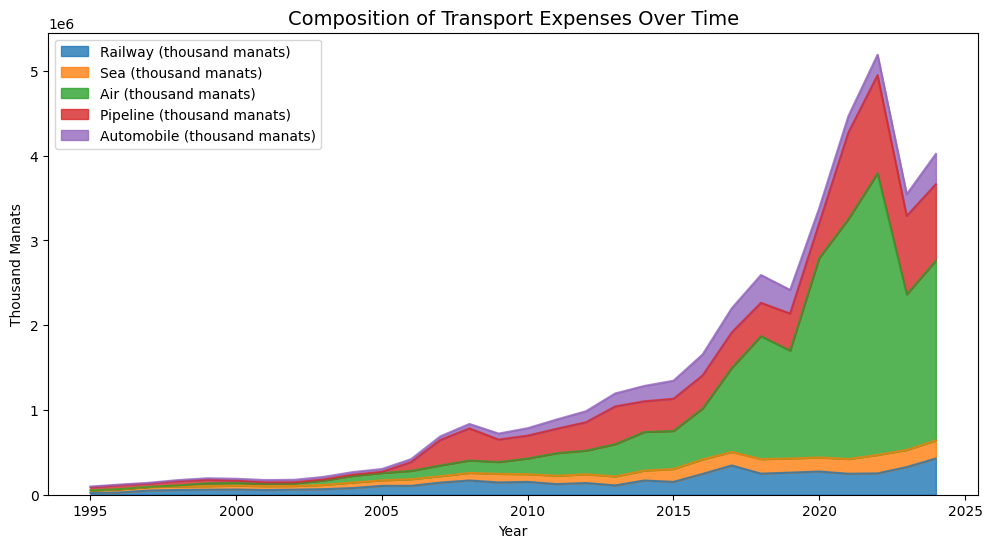

In [32]:
# We define our main categories (excluding the sub-categories and the pre-existing total)
categories = [
    'Railway (thousand manats)', 
    'Sea (thousand manats)', 
    'Air (thousand manats)', 
    'Pipeline (thousand manats)', 
    'Automobile (thousand manats)'
]

# Plotting
my_dataset[categories].plot(kind='area', stacked=True, figsize=(12, 6), alpha=0.8)
plt.title('Composition of Transport Expenses Over Time', fontsize=14)
plt.ylabel('Thousand Manats')
plt.legend(loc='upper left')
plt.show()

By looking at the charts above, we can identify a clear "Pivot Point" in the data.

* **The Air Sector Surge:** In the last 10 years (starting around 2014-2015), the Air transport sector has shown a massive improvement. It has moved from being a minor part of the freight economy to becoming a dominant force.
* **General Trend:** While all sectors are growing as the country's economy expands, the speed at which Air transport expenses are rising is much faster than the others.

This visual spike is the most significant change in the 30-year history of the dataset. To understand exactly how much it has taken over, we will now look at the **Percentage Share** of each sector.

In [33]:
# Calculating the % share to prove the Air sector improvement
# We take each sector and divide it by the Total
categories = ['Railway (thousand manats)', 'Sea (thousand manats)', 
              'Air (thousand manats)', 'Pipeline (thousand manats)', 
              'Automobile (thousand manats)']
df_shares = my_dataset[categories].div(my_dataset['Total (thousand manats)'], axis=0) * 100
# Let's look at the last 10 years of percentages
df_shares.head(10)

,Railway (thousand manats),Sea (thousand manats),Air (thousand manats),Pipeline (thousand manats),Automobile (thousand manats)
Year,,,,,
2024,10.627357,5.268799,52.803461,22.410933,8.889449
2023,9.198897,5.704973,51.762599,26.090219,7.243312
2022,4.845660,4.192315,64.004820,22.311196,4.646009
2021,5.538022,3.888156,63.372194,22.853367,4.348261
2020,8.097433,4.899454,69.600226,12.173921,5.228966
2019,10.786408,6.888882,52.682387,18.077494,11.564829
2018,9.589427,6.611863,55.974067,15.175416,12.649227
2017,15.684946,7.239290,45.073182,19.014164,12.988418
2016,14.831497,10.310612,36.309385,23.596993,14.951513


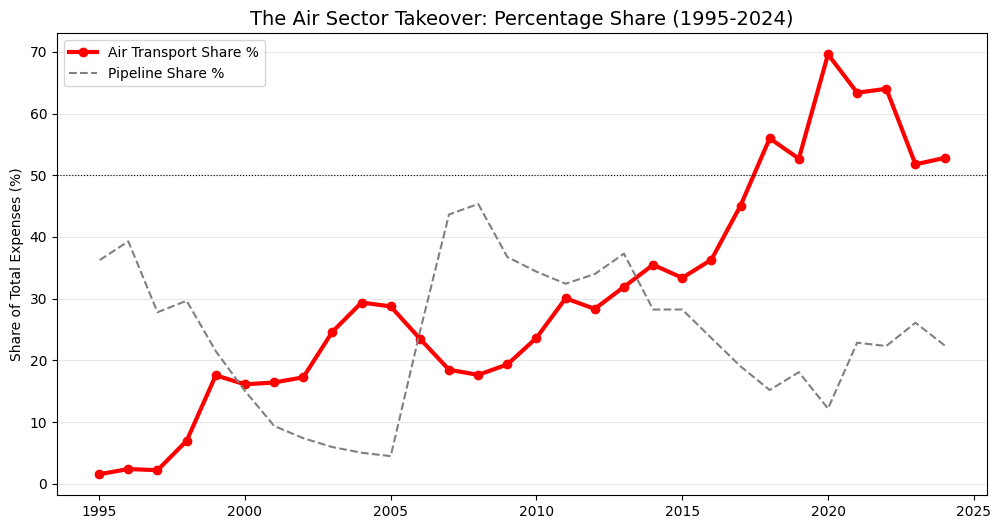

In [34]:
plt.figure(figsize=(12, 6))

# Plotting the Air sector share specifically to highlight it
plt.plot(df_shares.index, df_shares['Air (thousand manats)'], 
         label='Air Transport Share %', color='red', linewidth=3, marker='o')

# Plotting the Pipeline share for comparison
plt.plot(df_shares.index, df_shares['Pipeline (thousand manats)'], 
         label='Pipeline Share %', color='gray', linestyle='--')

plt.title('The Air Sector Takeover: Percentage Share (1995-2024)', fontsize=14)
plt.ylabel('Share of Total Expenses (%)')
plt.axhline(50, color='black', linewidth=0.8, linestyle=':') # A line at 50% for context
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()